In [22]:
"""
Import necessary libraries for data manipulation, visualization, and machine learning modeling. 

Libraries:
- NumPy: Fundamental package for scientific computing with support for mathematical functions and operations on arrays and matrices.
- Pandas: Powerful library for data manipulation and analysis, providing data structures like DataFrame and Series.
- Matplotlib: Plotting library for creating static, animated, and interactive visualizations.
- Math: Provides mathematical functions defined by the C standard.
- scikit-learn: Machine learning library providing various tools for data preprocessing, model selection, and evaluation.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [2]:
# Load the original training data from a CSV file and display basic information and the first few rows of the dataset.
original_train_data = pd.read_csv("Data/train.csv")
print(original_train_data.shape)
original_train_data.head()


(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Load the original test data from a CSV file and display basic information and the first few rows of the dataset.
original_test_data = pd.read_csv("Data/test.csv")
print(original_test_data.shape)
original_test_data.head()


(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# checking the datatypes of different features
original_train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

1. PassengerID is not gonna help us in the final prediction.
2. Pclass is categorical variable
3. We can find titles from the name and can make a new feature.
4. Sex is categorical variable
5. Age is numerical variable.
6. We can combine SibSp and Parch to make one feature called Family
7. Ticket will not help in the final prediction.
8. Fare is numerical variable.
9. Cabin is categorical variable.
10. Embarked is categorical variable.

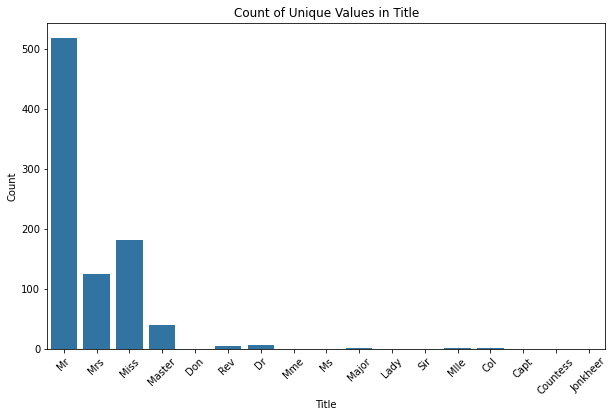

In [5]:
# Extract titles from the 'Name' column to create a new 'Title' column.
# Visualize the count of unique values in the 'Title' column to understand distribution.
# Define a dictionary mapping titles to numeric values for further processing.
original_train_data['Title'] = original_train_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
feature_name = 'Title'
plt.figure(figsize=(10, 6))
sns.countplot(data=original_train_data, x=feature_name)
plt.title('Count of Unique Values in {}'.format(feature_name))
plt.xlabel(feature_name)
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}


In [6]:
# Replace uncommon titles with 'Rare' and map specific titles to numeric value in training dataset
original_train_data['Title'] = original_train_data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
original_train_data['Title'] = original_train_data['Title'].replace('Mlle','Miss')
original_train_data['Title'] = original_train_data['Title'].replace('Ms','Miss')
original_train_data['Title'] = original_train_data['Title'].replace('Mme','Mrs')
original_train_data['Title'] = original_train_data['Title'].map(titles)
original_train_data['Title'] = original_train_data['Title'].fillna(0)


In [7]:
# Extract titles from the 'Name' column to create a new 'Title' column in the original test data.
# Replace uncommon titles with 'Rare' and map specific titles to numeric values.
original_test_data['Title'] = original_test_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
original_test_data['Title'] = original_test_data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
original_test_data['Title'] = original_test_data['Title'].replace('Mlle','Miss')
original_test_data['Title'] = original_test_data['Title'].replace('Ms','Miss')
original_test_data['Title'] = original_test_data['Title'].replace('Mme','Mrs')
original_test_data['Title'] = original_test_data['Title'].map(titles)
original_test_data['Title'] = original_test_data['Title'].fillna(0)


In [8]:
# Remove unwanted columns from the training and test datasets.
original_train_data.drop(columns=["PassengerId","Name","Ticket"], inplace=True)
original_test_data.drop(columns=["PassengerId","Name","Ticket"], inplace=True)


In [9]:
# Calculate the percentage of missing values in each column of the original training data.
(original_train_data.isnull().sum() / original_train_data.shape[0]) * 100


Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
Title        0.000000
dtype: float64

1. Age has approximately 20% missing values. I will use median to fill the missing values
2. Cabin has around 77% missing values which is quite high therefore I will drop this feature.
3. Embarked has around 0.2% missing values. I will use mode to replace the missing values.

In [10]:
# Calculate the percentage of missing values in each column of the original test data.
(original_test_data.isnull().sum() / original_test_data.shape[0]) * 100

Pclass       0.000000
Sex          0.000000
Age         20.574163
SibSp        0.000000
Parch        0.000000
Fare         0.239234
Cabin       78.229665
Embarked     0.000000
Title        0.000000
dtype: float64

1. Age has 20% missing values. I will use median to fill it.
2. Cabin has around 78% missing values. I will drop this feature.
3. Fare has around 0.23% missing values. I will use median to fil it.

In [11]:
#dropping cabin column from train data and test data
original_train_data.drop(columns=["Cabin"], inplace = True)
original_test_data.drop(columns=["Cabin"], inplace = True)

In [12]:
# Fill missing values in the 'Embarked' column of the original training data with the mode value.
original_train_data['Embarked'] = original_train_data['Embarked'].fillna(original_train_data['Embarked'].mode())

# Fill missing values in the 'Age' column of the original training data with the median value.
original_train_data['Age'] = original_train_data['Age'].fillna(original_train_data['Age'].median())

# Create a new 'Family' column by summing the 'SibSp' and 'Parch' columns.
original_train_data['Family'] = original_train_data['SibSp'] + original_train_data['Parch']

# Drop the 'SibSp' and 'Parch' columns.
original_train_data.drop(columns=['SibSp', 'Parch'], inplace=True)

# Convert the 'Pclass' column to string type.
original_train_data['Pclass'] = original_train_data['Pclass'].astype(str)

# Perform one-hot encoding for categorical variables in the original training data.
original_train_data = pd.get_dummies(original_train_data, dtype=int)

# Display the modified original training data.
original_train_data


,Survived,Age,Fare,Title,Family,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,1,1,0,0,1,0,1,0,0,1
1,1,38.0,71.2833,3,1,1,0,0,1,0,1,0,0
2,1,26.0,7.9250,2,0,0,0,1,1,0,0,0,1
3,1,35.0,53.1000,3,1,1,0,0,1,0,0,0,1
4,0,35.0,8.0500,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,5,0,0,1,0,0,1,0,0,1
887,1,19.0,30.0000,2,0,1,0,0,1,0,0,0,1
888,0,28.0,23.4500,2,3,0,0,1,1,0,0,0,1
889,1,26.0,30.0000,1,0,1,0,0,0,1,1,0,0


In [13]:
# Impute missing values in the 'Fare' column of the original test data with the median value.
original_test_data['Fare'] = original_test_data['Fare'].fillna(original_test_data['Fare'].median())

# Impute missing values in the 'Age' column of the original test data with the median value.
original_test_data['Age'] = original_test_data['Age'].fillna(original_test_data['Age'].median())

# Create a new 'Family' column by summing the 'SibSp' and 'Parch' columns.
original_test_data['Family'] = original_test_data['SibSp'] + original_test_data['Parch']

# Drop the 'SibSp' and 'Parch' columns.
original_test_data.drop(columns=['SibSp', 'Parch'], inplace=True)

# Convert the 'Pclass' column to string type.
original_test_data['Pclass'] = original_test_data['Pclass'].astype(str)

# Perform one-hot encoding for categorical variables in the original test data.
original_test_data = pd.get_dummies(original_test_data, dtype=int)

# Display the modified original test data.
original_test_data



,Age,Fare,Title,Family,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,7.8292,1,0,0,0,1,0,1,0,1,0
1,47.0,7.0000,3,1,0,0,1,1,0,0,0,1
2,62.0,9.6875,1,0,0,1,0,0,1,0,1,0
3,27.0,8.6625,1,0,0,0,1,0,1,0,0,1
4,22.0,12.2875,3,2,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,27.0,8.0500,1,0,0,0,1,0,1,0,0,1
414,39.0,108.9000,5,0,1,0,0,1,0,1,0,0
415,38.5,7.2500,1,0,0,0,1,0,1,0,0,1
416,27.0,8.0500,1,0,0,0,1,0,1,0,0,1


In [14]:
# Store the 'Survived' column (target) of the training data into a separate dataset.
original_train_data_y = original_train_data["Survived"]

# Drop the 'Survived' column from the training data.
original_train_data.drop(columns="Survived", inplace=True)

# Normalize the training dataset.
scaler = StandardScaler()
original_train_data_norm = scaler.fit_transform(original_train_data)

# Split the training data into two parts: training set and validation set.
X_train, X_validation, y_train, y_validation = train_test_split(original_train_data_norm, original_train_data_y, test_size=0.2, random_state=42)


In [32]:
# Logistic Regression model
logistic_model = LogisticRegression()

# Train the logistic regression model on the training data.
logistic_model.fit(X_train, y_train)

# Predict the target variable for the validation set.
y_pred = logistic_model.predict(X_validation)

# Calculate the training and test accuracies.
train_acc_logistic = logistic_model.score(X_train, y_train)
test_acc_logistic = logistic_model.score(X_validation, y_validation)

# Print the training and test accuracies.
print("Training Accuracy = ", train_acc_logistic)
print("Cross Validation Accuracy = ", test_acc_logistic)


Training Accuracy =  0.8188202247191011
Cross Validation Accuracy =  0.7821229050279329


In [21]:
#Support Vector Machine
svc_model = SVC()


# Train the support vector machine model on the training data.
svc_model.fit(X_train, y_train)

# Predict the target variable for the validation set.
y_pred = svc_model.predict(X_validation)

# Calculate the training and test accuracies.
train_acc_svc = svc_model.score(X_train, y_train)
test_acc_svc = svc_model.score(X_validation, y_validation)

# Print the training and test accuracies.
print("Training Accuracy = ", train_acc_svc)
print("Cross Validation Accuracy = ", test_acc_svc)

Training Accuracy =  0.8441011235955056
Cross Validation Accuracy =  0.8212290502793296


In [28]:
#Gaussian Naive Bayes Algorithm
gnb_model = GaussianNB()

# Train the support vector machine model on the training data.
gnb_model.fit(X_train, y_train)

# Predict the target variable for the validation set.
y_pred = gnb_model.predict(X_validation)

# Calculate the training and test accuracies.
train_acc_gnb = gnb_model.score(X_train, y_train)
test_acc_gnb = gnb_model.score(X_validation, y_validation)

# Print the training and test accuracies.
print("Training Accuracy = ", train_acc_gnb)
print("Cross Validation Accuracy = ", test_acc_gnb)

Training Accuracy =  0.7963483146067416
Cross Validation Accuracy =  0.7541899441340782


In [27]:
#K-Nearest Neighbours

#Define the hyperparameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]
}

#Create a knn_model
knn_model = KNeighborsClassifier()

# Perform grid search with cross-validation to find the best hyperparameters.
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5)

# Fit the grid search to the training data.
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search.
knn_model = grid_search.best_estimator_

# Get the best score from the grid search.
best_score = grid_search.best_score_


# Calculate the training and test accuracies.
train_acc_knn = knn_model.score(X_train, y_train)
test_acc_knn = knn_model.score(X_validation, y_validation)

# Print the best parameters, best score, and accuracies.
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", best_score)
print("Training Accuracy =", train_acc_knn)
print("Cross Validation Accuracy =", test_acc_knn)

Best Parameters: {'n_neighbors': 3}
Best Score: 0.8159657244164287
Training Accuracy = 0.8693820224719101
Cross Validation Accuracy = 0.8044692737430168


In [29]:
# Decision Tree Model with hyperparameter tuning using GridSearchCV

# Define the parameter grid for hyperparameter tuning.
param_grid = {
    'min_samples_split': [2, 10, 30, 50, 100, 200, 300, 700],
    'max_depth': [1, 2, 3, 4, 8, 16, 32, 64, None]
}

# Create a decision tree classifier model.
decision_model = DecisionTreeClassifier()

# Perform grid search with cross-validation to find the best hyperparameters.
grid_search = GridSearchCV(estimator=decision_model, param_grid=param_grid, cv=5)

# Fit the grid search to the training data.
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search.
decision_best_model = grid_search.best_estimator_

# Get the best score from the grid search.
best_score = grid_search.best_score_

# Calculate the training and test accuracies of the best model.
train_acc_decision = decision_best_model.score(X_train, y_train)
test_acc_decision = decision_best_model.score(X_validation, y_validation)

# Print the best parameters, best score, and accuracies.
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", best_score)
print("Training Accuracy =", train_acc_decision)
print("Cross Validation Accuracy =", test_acc_decision)


Best Parameters: {'max_depth': 3, 'min_samples_split': 2}
Best Score: 0.8187727765192554
Training Accuracy = 0.8342696629213483
Cross Validation Accuracy = 0.8156424581005587


In [34]:
# Random Forest Model with hyperparameter tuning using GridSearchCV

# Define the parameter grid for hyperparameter tuning.
param_grid = {
    'min_samples_split': [2, 3, 4],
    'max_depth': [5, 10, None],
    'n_estimators': [10, 100, 200, 500]
}

# Create a random forest classifier model.
forest_model = RandomForestClassifier()

# Perform grid search with cross-validation to find the best hyperparameters.
grid_search = GridSearchCV(estimator=forest_model, param_grid=param_grid, cv=5)

# Fit the grid search to the training data.
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search.
forest_best_model = grid_search.best_estimator_

# Get the best score from the grid search.
best_score = grid_search.best_score_

# Calculate the training and test accuracies of the best model.
train_acc_forest = forest_best_model.score(X_train, y_train)
test_acc_forest = forest_best_model.score(X_validation, y_validation)

# Print the best parameters, best score, and accuracies.
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", best_score)
print("Training Accuracy =", train_acc_forest)
print("Cross Validation Accuracy =", test_acc_forest)


Best Parameters: {'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 500}
Best Score: 0.8342263370432385
Training Accuracy = 0.8637640449438202
Cross Validation Accuracy = 0.8156424581005587


In [37]:
#Printing the cross validation result of each model
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Naive Bayes', 'Decision Tree'],
                       'Training Accuracy': [train_acc_svc, train_acc_knn, train_acc_logistic, train_acc_forest, train_acc_gnb,
                                train_acc_decision],
                       'Validation Accuracy': [test_acc_svc, test_acc_knn, test_acc_logistic, test_acc_forest, test_acc_gnb,
                                test_acc_decision]})

models.sort_values(by = 'Validation Accuracy', ascending = False, ignore_index = True)



,Model,Training Accuracy,Validation Accuracy
0,Support Vector Machines,0.844101,0.821229
1,Random Forest,0.863764,0.815642
2,Decision Tree,0.834270,0.815642
3,KNN,0.869382,0.804469
4,Logistic Regression,0.818820,0.782123
5,Naive Bayes,0.796348,0.754190


In [38]:
#will be using svc model

# Normalize the test dataset using the same scaler used for the training data.
scaler = StandardScaler()
original_test_data_norm = scaler.fit_transform(original_test_data)

# Initialize the result dataset with columns for 'PassengerId' and 'Survived'.
result = pd.DataFrame(columns=['PassengerId', 'Survived'])

# Read the raw test data to extract 'PassengerId' for the result dataset.
test_data_raw = pd.read_csv("Data/test.csv")
result['PassengerId'] = test_data_raw['PassengerId']

# Predict survival on the original test dataset using the best random forest model.
result_pred = svc_model.predict(original_test_data_norm)

# Store the predictions in the result dataset.
result['Survived'] = result_pred

# Display the result dataset with 'PassengerId' and 'Survived'.
result


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [39]:
# Save the result dataset to a CSV file without including the index column.
result.to_csv('Submissions/submission_trees.csv', index=False)
